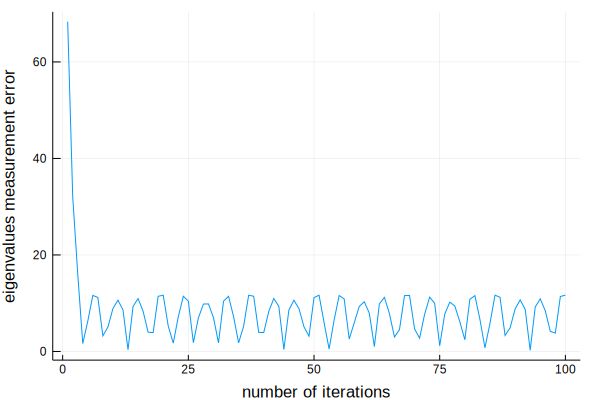

Row1: pattern eigenvalues 
Row2:eigenvalues computed by QR algoritm:


2-element Array{Any,1}:
 [7.90339, 8.8779, 8.8779, 61.9248, 257.416] 
 [3.0431, 7.90339, 14.7127, 61.9248, 257.416]

In [55]:
using CSV
using Plots
using Polynomials
using Statistics
using LinearAlgebra
using Distributions
using Printf
using DataFrames


function qr_algorithm_1(A)
    err = []
    for i in 1:100
        AF =  qr(A)
        A = transpose(AF.Q)*A*AF.Q
        push!(err,sum(map((E,A)-> abs((E-A)),EIGENVALUES,sort(diag(A)))))
    end
    display(plot(1:size(err,1),err,ylabel="eigenvalues measurement error",xlabel="number of iterations",legend=false))
    return diag(A)
end

function qr_algorithm_2(A)
    err = []
    for i in 1:100
        AF =  qr(A)
        A = AF.R *AF.Q
        push!(err,sum(map((E,A)-> abs((E-A)),EIGENVALUES,sort(diag(A)))))
    end
    display(plot(1:size(err,1),err,ylabel="eigenvalues measurement error",xlabel="number of iterations",legend=false))
    return diag(A)
end

A = map(x->floor(x),(100*rand(5,5)))
EIGENVALUES = sort(map(x->real(x),eigvals(A)))

print("Row1: pattern eigenvalues \nRow2:eigenvalues computed by QR algoritm:\n")
values_comparison = []
push!(values_comparison,EIGENVALUES)
push!(values_comparison,sort(qr_algorithm_2(A)))



